In [ ]:
import re

In [3]:
cvar_re = re.compile(r'set\s+([a-zA-Z_]+)\s+([0-9.]*)')
def parse(filename):
    data = {}
    with open(filename) as f:
        for line in f:
            m = cvar_re.match(line)
            if not m:
                continue
            var, val = m.groups()
            data[var] = float(val)
    return data

In [4]:
import os, re
def load_skills(dir_name):
    skills = [None] * 21
    cfg_re = re.compile(r'skill_([0-9]{2}).cfg')
    for filename in os.listdir(dir_name):
        m = cfg_re.match(filename)
        if not m:
            continue
        skill = int(m.groups()[0])
        skills[skill] = parse(os.path.join(dir_name, filename))
    return skills
old_skills = load_skills('old_skills')
new_skills = load_skills('new_skills')

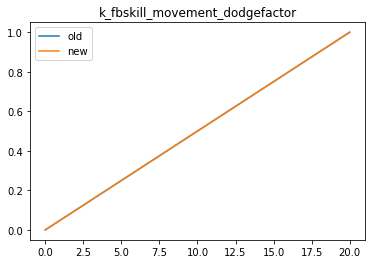

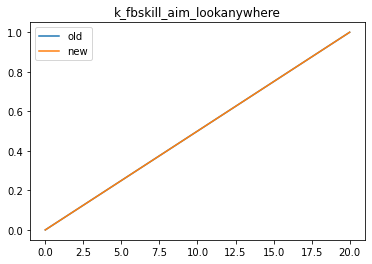

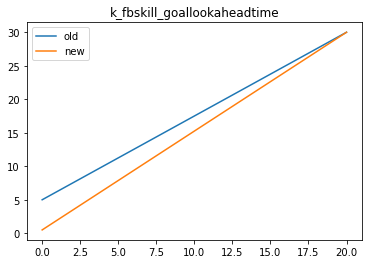

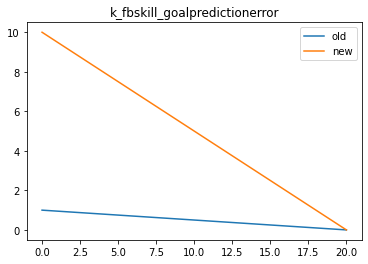

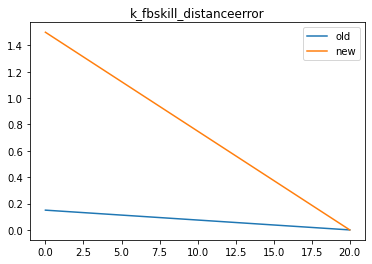

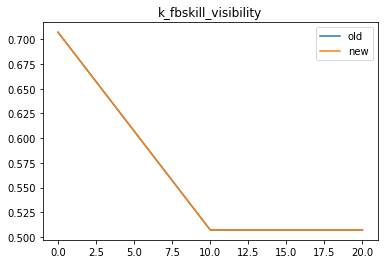

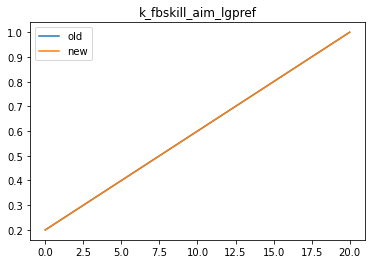

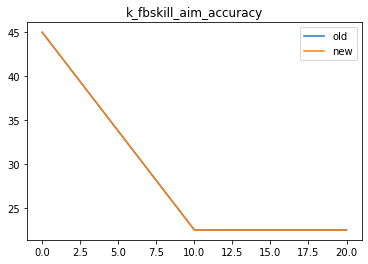

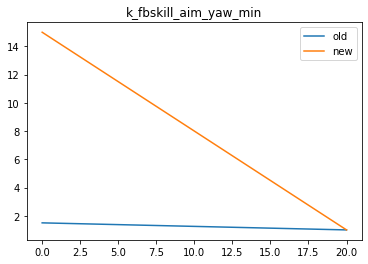

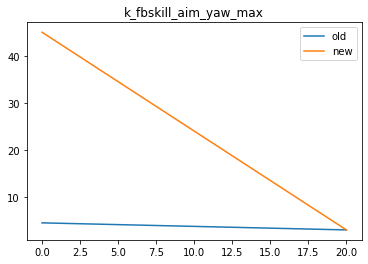

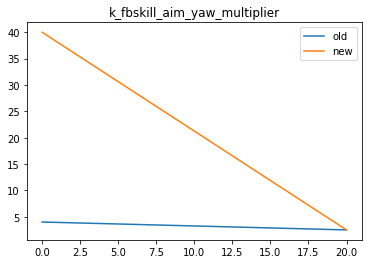

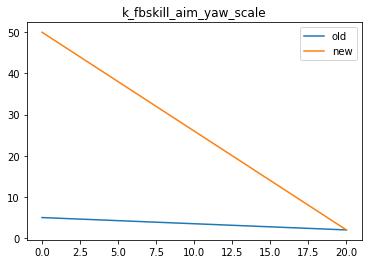

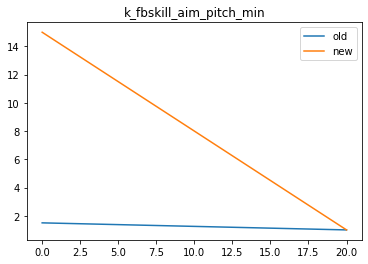

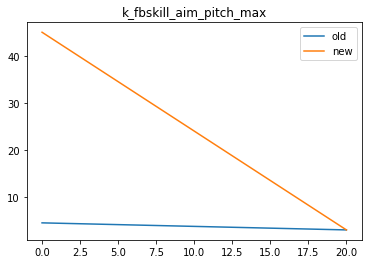

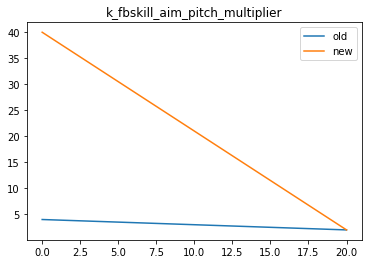

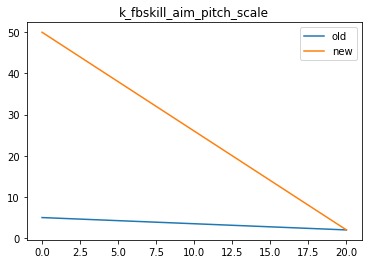

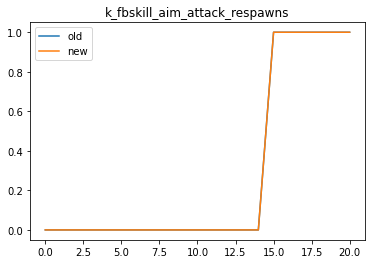

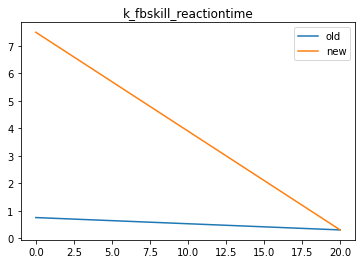

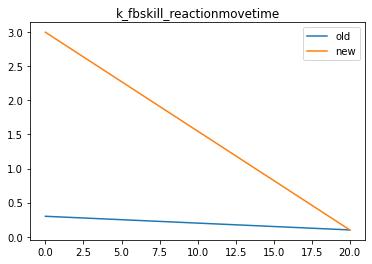

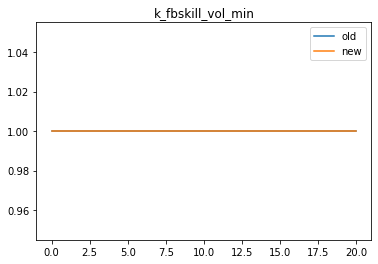

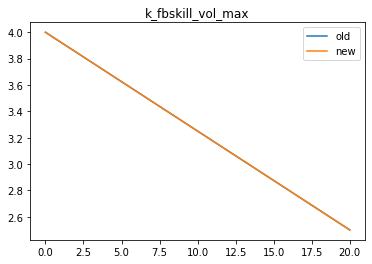

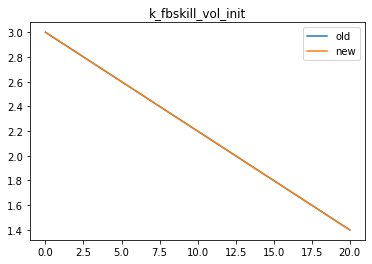

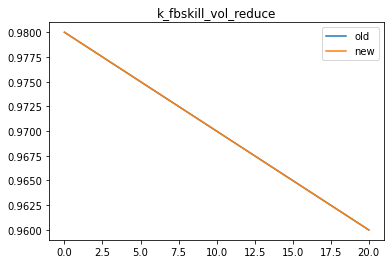

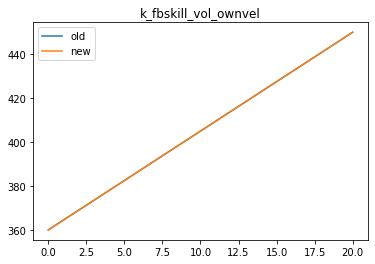

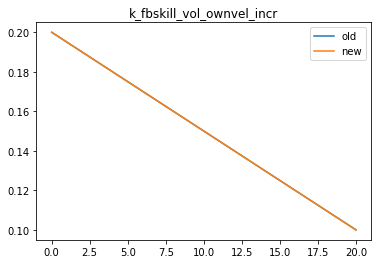

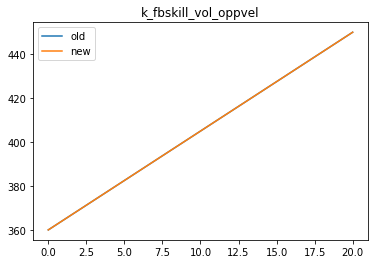

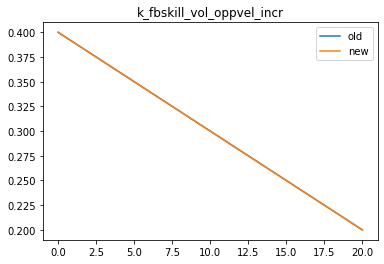

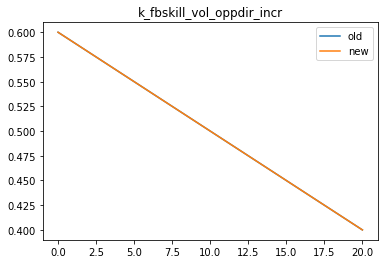

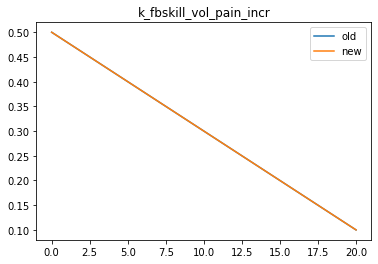

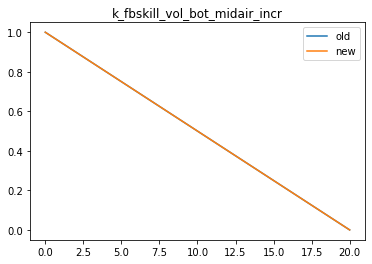

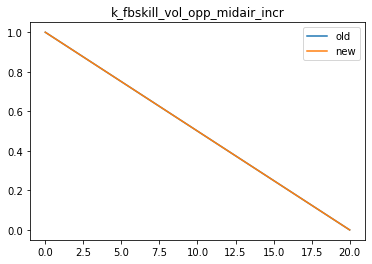

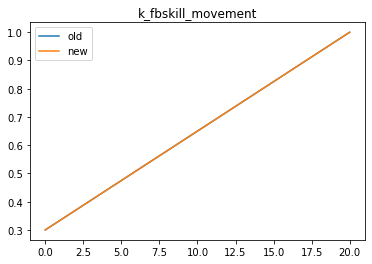

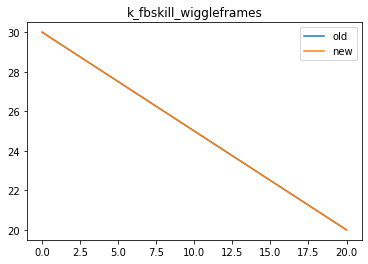

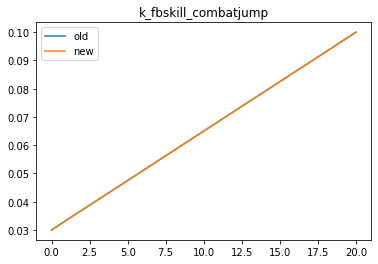

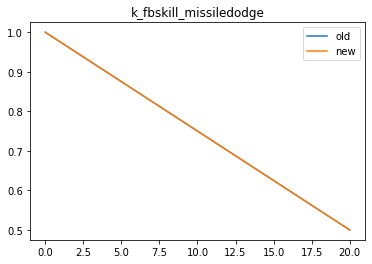

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
for cvar in old_skills[0].keys():
    plt.plot(range(21), [d[cvar] for d in old_skills], label='old')
    plt.plot(range(21), [d[cvar] for d in new_skills], label='new')
    plt.title(cvar)
    plt.legend()
    plt.show()